# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Héctor Eduardo Ayala Gudiño

- ID: A01638996

- My carreer: Ingieneria en Tecnologias Computacionales


# Importing libraries

In [213]:
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Ruta = "/content/drive/My Drive/Colab Notebooks/A01638996_X.csv"

df = pd.read_csv(Ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## b) Data managment


Print the first 7 rows

In [ ]:
df.head(7)

Unnamed: 0         x1        x2         x3        x4        x5         x6  \
0           0   6.785931  5.809005   6.574202 -6.507486  7.149268   7.208498   
1           1   4.518057  0.316447   0.197838 -4.071276 -4.781609  -5.300265   
2           2   6.388971 -0.828451  -3.980849 -7.215281 -5.269422  -6.196946   
3           3   7.346951 -1.593484  -0.400684 -8.338700 -5.233981  -6.321821   
4           4  -1.287490 -1.690289 -10.241190 -3.693207 -7.761728  -2.911401   
5           5   7.393538  2.648604   0.225889 -6.407259 -6.026259  -6.596591   
6           6  12.432031  4.403405   6.226316 -5.530988  6.146270  10.075178   

          x7         x8        x9        x10       x11       x12       x13  \
0  -0.587492   4.875428 -5.098658  11.301148  8.096129 -5.943270 -0.433286   
1 -11.213159  11.130469  3.950373   0.609792  6.797545 -3.395296 -5.579546   
2  -9.071985  10.641410  5.891521   0.518589  4.858324 -5.260074 -6.785575   
3 -12.652973   9.443672  9.225148  -1.556317  3.494909 -1.912404 -1.378398   
4   3.803531  -4.635259 -5.964701  -5.793918  9.893213  4.143940 -2.875815   
5  -6.567748   3.761371  3.833292   0.560532  6.935013 -3.985978 -4.056646   
6  -2.042311  10.944515 -5.599727   7.844294  7.359897 -7.916713  4.267727   

        x14       x15  
0  2.847650  1.863974  
1  1.398557  3.992863  
2  3.758417  3.121591  
3  1.128869  6.444707  
4 -2.003306 -2.782016  
5  2.329893  4.577437  
6  3.630248  2.483553

Print the last 4 rows

In [ ]:
df.tail(4)

Unnamed: 0        x1        x2        x3        x4        x5         x6  \
374         374 -4.673884  2.732087 -7.418259 -4.940356 -6.325088   0.796689   
375         375 -4.300481  1.344196 -7.323818 -3.943219 -5.481598   1.130695   
376         376  8.663232  8.303528  3.263017 -4.210363  2.689575   7.066333   
377         377  6.322217  2.829717  7.188005 -4.724383  6.832158  10.045850   

           x7        x8        x9       x10        x11       x12       x13  \
374  8.498136 -5.078372 -9.174457 -6.932334  12.237894 -0.414852 -5.269136   
375  5.890986 -6.672368 -9.433454 -7.946455  11.432968  0.436423 -6.738960   
376  0.585445  7.946704 -8.745116  9.392746   4.781831 -8.410193  1.145609   
377  4.492113  5.606513 -4.982990  8.212290   8.161830 -9.372243 -0.146209   

          x14       x15  
374 -0.905719 -5.961396  
375 -7.731259 -0.863006  
376  3.438913 -2.041768  
377  3.179880  1.613216

How many rows and columns are in your data?

Use the `shape` method


In [ ]:
print("Columns: " + str(df.shape[1]))
print("Rows: " + str(df.shape[0]))

Columns: 16
Rows: 378


Print the name of all columns

Use the `columns` method

In [ ]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [ ]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
x12           float64
x13           float64
x14           float64
x15           float64
dtype: object

What is the meaning of rows and columns?

Your responses here

1. The unnamed column is the identifier for each row

2. For all the other coumns there is no information

3. the number of rows is the number of observations

...

Print a statistical summary of your columns


In [ ]:
df.describe()

Unnamed: 0          x1          x2          x3          x4          x5  \
count  378.000000  378.000000  378.000000  378.000000  378.000000  378.000000   
mean   188.500000    3.488687    2.414508   -0.464332   -4.657437   -2.544294   
std    109.263443    7.069108    3.214590    6.994275    2.385908    4.797794   
min      0.000000  -10.125193   -5.844723  -16.467165  -10.330297  -10.953678   
25%     94.250000   -4.714211   -0.158626   -8.355808   -6.307574   -6.197785   
50%    188.500000    6.814695    1.878778    1.116899   -4.805379   -4.329195   
75%    282.750000    8.911891    5.107820    5.417075   -3.039532    2.215026   
max    377.000000   14.260458   11.258836   10.940678    2.395864    9.967150   

               x6          x7          x8          x9         x10         x11  \
count  378.000000  378.000000  378.000000  378.000000  378.000000  378.000000   
mean     0.577479   -0.298314    2.735837   -3.023556    0.227599    6.555202   
std      6.634127    7.048467    7.054681    5.982146    5.869518    2.474108   
min    -11.472928  -15.239059  -11.312069  -13.232402  -10.015754   -0.575084   
25%     -5.202536   -8.014324   -5.635949   -7.673040   -4.746566    4.685618   
50%     -0.575152    1.624665    6.109202   -5.734153   -0.887920    6.423859   
75%      7.563075    5.753086    8.084622    3.507488    6.250904    8.148730   
max     14.036864   11.428366   14.098161   10.317169   12.359809   13.299318   

              x12         x13         x14         x15  
count  378.000000  378.000000  378.000000  378.000000  
mean    -3.700533   -3.188583    0.711183    0.382194  
std      4.736472    3.414581    3.723742    4.293126  
min    -14.105713  -11.732069   -7.852881   -8.477409  
25%     -8.014005   -5.622444   -2.302169   -3.448296  
50%     -2.924041   -3.783679    1.245635    1.291111  
75%      0.226441   -0.631374    3.532381    3.780780  
max      5.657975    4.798974    9.872532   10.531022

1. What is the minumum and maximum values of each variable:

2. What is the mean and standar deviation of each variable:

3. What the 25%, 50% and 75% represent?: It means that the x% of the values are below this number   

Rename the columns using the same name with capital letters

In [ ]:
df.columns = ["","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15"]
df.columns


Index(['', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15'],
      dtype='object')

Rename the columns to their original names

In [ ]:
df.columns = ["","x1","x2","x3","x4","x5","x6","x7","x8","x9","x10","x11","x12","x13","x14","x15"]
df.columns

Index(['', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15'],
      dtype='object')

Use two different alternatives to get one of the columns




In [ ]:
df.x1

0      6.785931
1      4.518057
2      6.388971
3      7.346951
4     -1.287490
         ...   
373    9.491045
374   -4.673884
375   -4.300481
376    8.663232
377    6.322217
Name: x1, Length: 378, dtype: float64

In [ ]:
df['x1']

0      6.785931
1      4.518057
2      6.388971
3      7.346951
4     -1.287490
         ...   
373    9.491045
374   -4.673884
375   -4.300481
376    8.663232
377    6.322217
Name: x1, Length: 378, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [ ]:
df.iloc[62:73, 1:3]

x1        x2
62   8.595171  4.777100
63   7.297909  8.371201
64   7.839506  8.413263
65   9.267329  0.047732
66   5.416905  7.858428
67  -6.547212  2.226548
68  -5.793105  0.232479
69  -8.990690  0.117405
70  11.350080  0.383819
71   5.144618  3.322000
72   8.015103  5.908465

For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [ ]:
total_rows = df.shape[0]

nc = df.iloc[:, 1:3].isnull().sum()
nnc = df.iloc[:, 1:3].notnull().sum()

ver = (nc + nnc) == total_rows

print("Null values per column:\n", nc)
print("Non-null values per column:\n", nnc)
print("Verification:\n", ver)


Null values per column:
 x1    0
x2    0
dtype: int64
Non-null values per column:
 x1    378
x2    378
dtype: int64
Verification:
 x1    True
x2    True
dtype: bool


**Discard** the last column


In [ ]:
df = df.drop(df.columns[-1], axis=1)
df

x1        x2         x3        x4        x5         x6  \
0      0  6.785931  5.809005   6.574202 -6.507486  7.149268   7.208498   
1      1  4.518057  0.316447   0.197838 -4.071276 -4.781609  -5.300265   
2      2  6.388971 -0.828451  -3.980849 -7.215281 -5.269422  -6.196946   
3      3  7.346951 -1.593484  -0.400684 -8.338700 -5.233981  -6.321821   
4      4 -1.287490 -1.690289 -10.241190 -3.693207 -7.761728  -2.911401   
..   ...       ...       ...        ...       ...       ...        ...   
373  373  9.491045 -1.930896   1.609178 -6.294347 -3.128242  -3.695064   
374  374 -4.673884  2.732087  -7.418259 -4.940356 -6.325088   0.796689   
375  375 -4.300481  1.344196  -7.323818 -3.943219 -5.481598   1.130695   
376  376  8.663232  8.303528   3.263017 -4.210363  2.689575   7.066333   
377  377  6.322217  2.829717   7.188005 -4.724383  6.832158  10.045850   

            x7         x8        x9        x10        x11       x12       x13  \
0    -0.587492   4.875428 -5.098658  11.301148   8.096129 -5.943270 -0.433286   
1   -11.213159  11.130469  3.950373   0.609792   6.797545 -3.395296 -5.579546   
2    -9.071985  10.641410  5.891521   0.518589   4.858324 -5.260074 -6.785575   
3   -12.652973   9.443672  9.225148  -1.556317   3.494909 -1.912404 -1.378398   
4     3.803531  -4.635259 -5.964701  -5.793918   9.893213  4.143940 -2.875815   
..         ...        ...       ...        ...        ...       ...       ...   
373  -9.307651   9.881907  1.860460   3.665979   4.131606 -3.647729 -5.029592   
374   8.498136  -5.078372 -9.174457  -6.932334  12.237894 -0.414852 -5.269136   
375   5.890986  -6.672368 -9.433454  -7.946455  11.432968  0.436423 -6.738960   
376   0.585445   7.946704 -8.745116   9.392746   4.781831 -8.410193  1.145609   
377   4.492113   5.606513 -4.982990   8.212290   8.161830 -9.372243 -0.146209   

          x14  
0    2.847650  
1    1.398557  
2    3.758417  
3    1.128869  
4   -2.003306  
..        ...  
373  8.833416  
374 -0.905719  
375 -7.731259  
376  3.438913  
377  3.179880  

[378 rows x 15 columns]

### Questions

Based on the previous results, provide a full description of yout dataset

Your response: As it appears it is a dataset with both negative and positive decimal numbers between -17 and 15, there is no null data, the maximun standar deviation is of 7, and there are 15 (before discarding the last one) variables for each observation




## c) Data visualization

Plot in the histogram of one of the variables

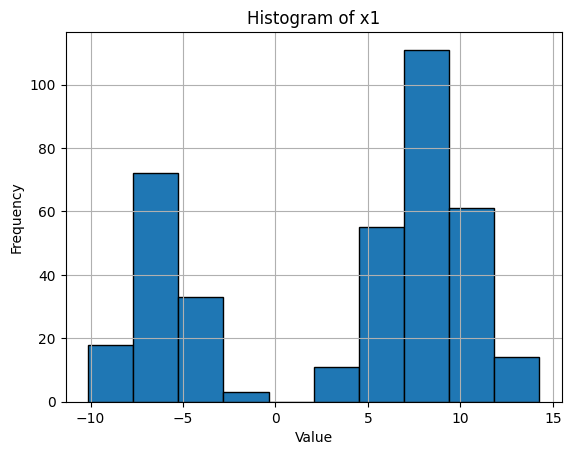

In [ ]:
df['x1'].hist(edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of x1')
plt.show()

Plot in the same figure the histogram of two variables






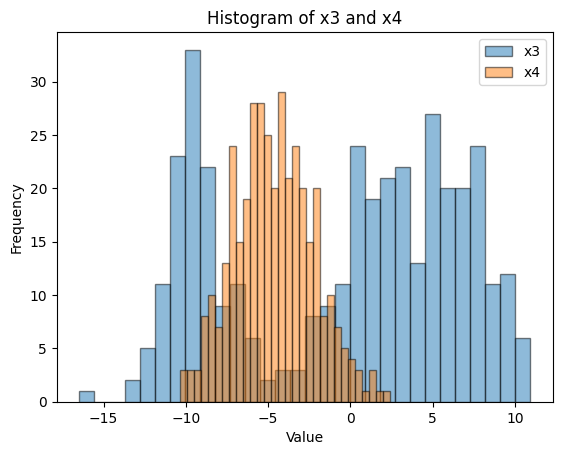

In [286]:
plt.hist(df['x3'], bins=30, alpha=0.5, label='x3', edgecolor='black')
plt.hist(df['x4'], bins=30, alpha=0.5, label='x4', edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of x3 and x4')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here: Based on the histograms, it appears that the two variables exhibit an interesting complementary relationship. When the frequency of one variable is low, the frequency of the other tends to be higher, and vice versa. While this observation might be coincidental, it could also point to a potential underlying pattern worth investigating further.

Plot the boxplot of one of the variables

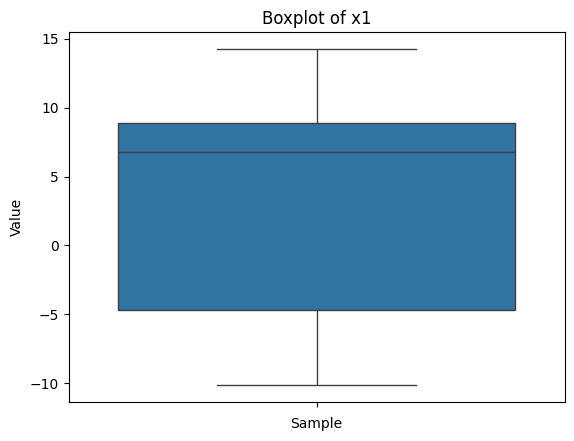

In [ ]:
sns.boxplot(y=df['x1'])

plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Boxplot of x1')
plt.show()

Plot in the same figure the boxplot of two variables

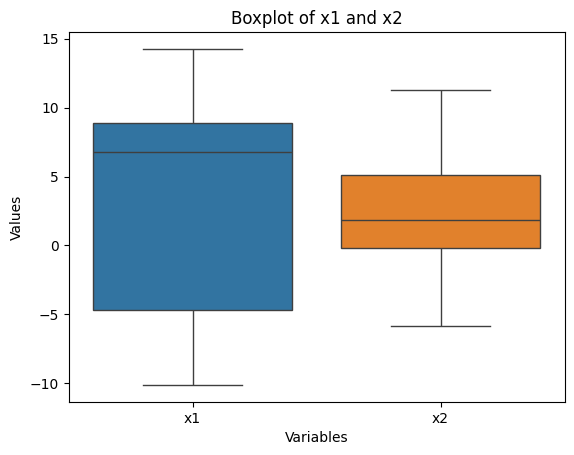

In [ ]:
sns.boxplot(data=df[['x1', 'x2']])

plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Boxplot of x1 and x2')

plt.show()

Based on these plots, provide a description of your data:

Your response here: Based on the box plot comparing the two variables, it is evident that x2 shows much more concentration around its central values compared to x1; this also shows us that the extrems of x2 are much closer than those from x1, probably meaning a more heterogenous distribution

Plot the scatter plot between all pair of variables

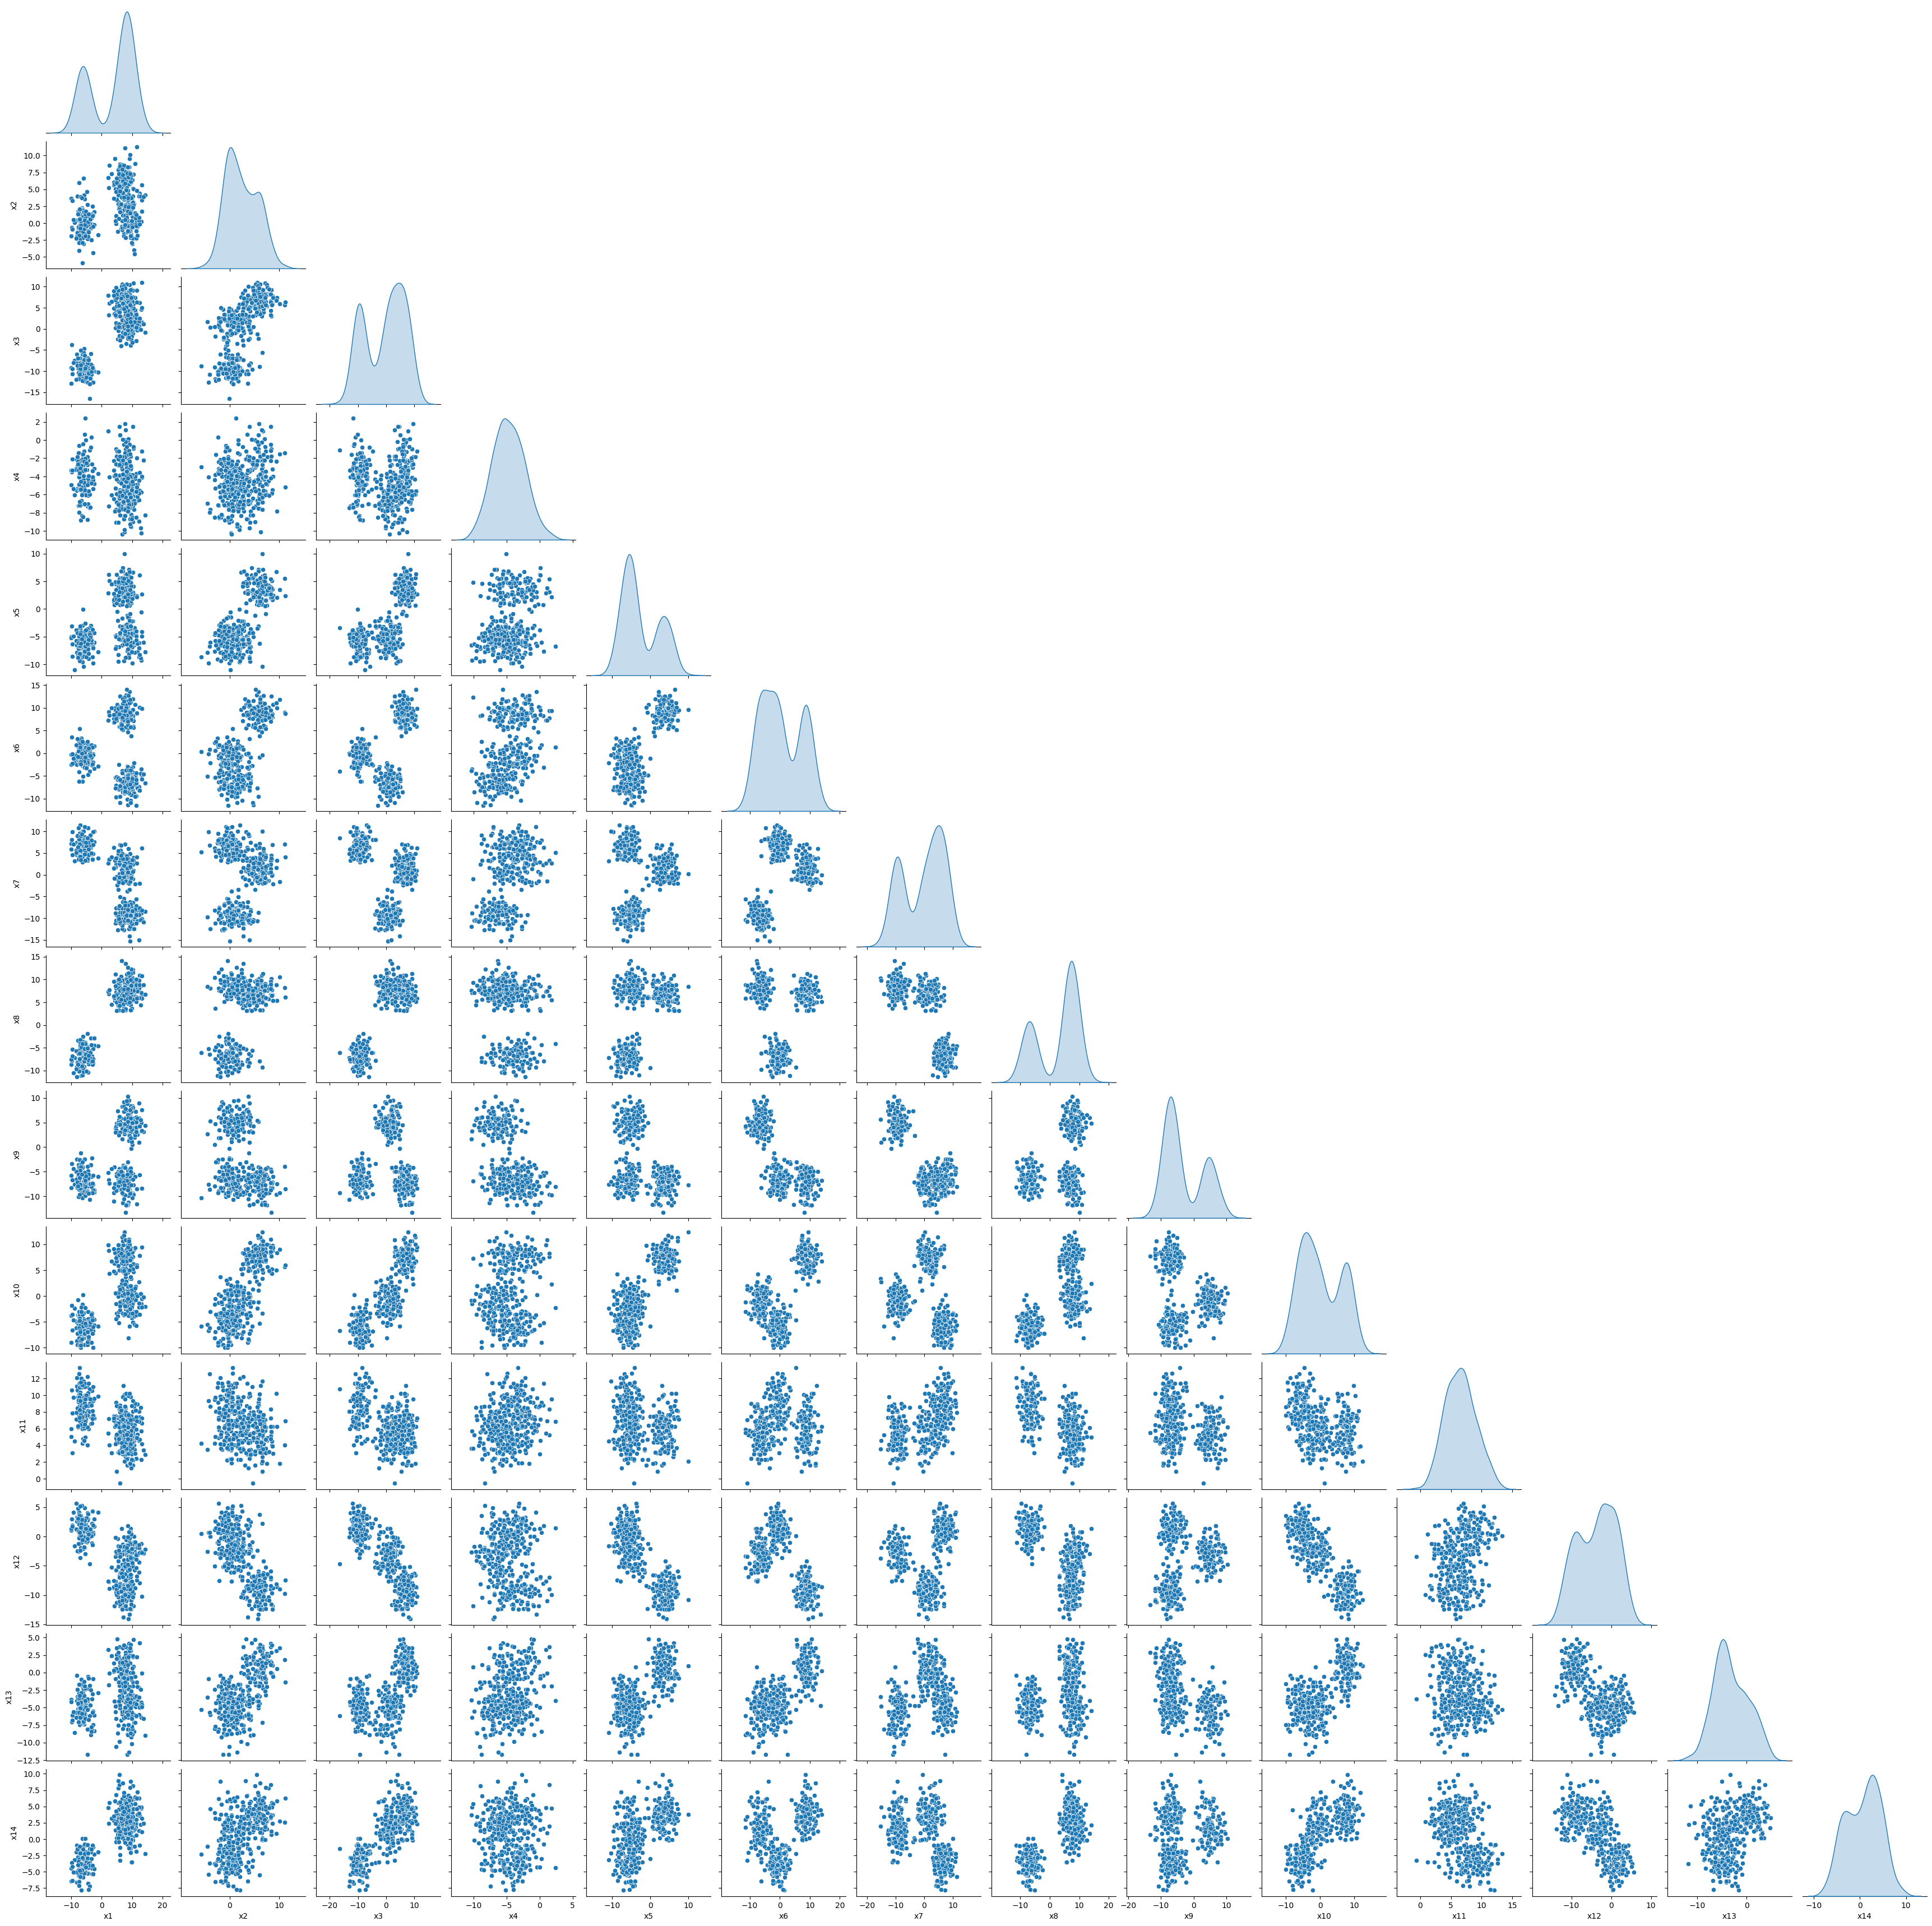

In [ ]:
sns.pairplot(df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6','x7','x8','x9','x10','x11','x12','x13','x14']], corner=True, diag_kind="kde")
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response: Based on the scatter plot, approximately two-thirds of the data points appear to be grouped into distinct clusters of three, with clear separations between them. This suggests that these subsets of data share similar characteristics, forming well-defined groups. However, in the remaining third of the dataset, no obvious clustering is observed; instead, the variables appear to blend into a single, undifferentiated group. Given the large number of variables in the dataset, this lack of clear clustering in a portion of the data may not significantly impact overall patterns




## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [ ]:
km = KMeans(n_clusters=3, n_init="auto")
Cluster1 = km.fit_predict(df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6','x7','x8','x9','x10','x11','x12','x13','x14']])

Add to your dataset a column with the estimated cluster to each data point

In [ ]:
df['Cluster1'] = Cluster1
df

x1        x2         x3        x4        x5         x6  \
0      0  6.785931  5.809005   6.574202 -6.507486  7.149268   7.208498   
1      1  4.518057  0.316447   0.197838 -4.071276 -4.781609  -5.300265   
2      2  6.388971 -0.828451  -3.980849 -7.215281 -5.269422  -6.196946   
3      3  7.346951 -1.593484  -0.400684 -8.338700 -5.233981  -6.321821   
4      4 -1.287490 -1.690289 -10.241190 -3.693207 -7.761728  -2.911401   
..   ...       ...       ...        ...       ...       ...        ...   
373  373  9.491045 -1.930896   1.609178 -6.294347 -3.128242  -3.695064   
374  374 -4.673884  2.732087  -7.418259 -4.940356 -6.325088   0.796689   
375  375 -4.300481  1.344196  -7.323818 -3.943219 -5.481598   1.130695   
376  376  8.663232  8.303528   3.263017 -4.210363  2.689575   7.066333   
377  377  6.322217  2.829717   7.188005 -4.724383  6.832158  10.045850   

            x7         x8        x9        x10        x11       x12       x13  \
0    -0.587492   4.875428 -5.098658  11.301148   8.096129 -5.943270 -0.433286   
1   -11.213159  11.130469  3.950373   0.609792   6.797545 -3.395296 -5.579546   
2    -9.071985  10.641410  5.891521   0.518589   4.858324 -5.260074 -6.785575   
3   -12.652973   9.443672  9.225148  -1.556317   3.494909 -1.912404 -1.378398   
4     3.803531  -4.635259 -5.964701  -5.793918   9.893213  4.143940 -2.875815   
..         ...        ...       ...        ...        ...       ...       ...   
373  -9.307651   9.881907  1.860460   3.665979   4.131606 -3.647729 -5.029592   
374   8.498136  -5.078372 -9.174457  -6.932334  12.237894 -0.414852 -5.269136   
375   5.890986  -6.672368 -9.433454  -7.946455  11.432968  0.436423 -6.738960   
376   0.585445   7.946704 -8.745116   9.392746   4.781831 -8.410193  1.145609   
377   4.492113   5.606513 -4.982990   8.212290   8.161830 -9.372243 -0.146209   

          x14  Cluster1  
0    2.847650         2  
1    1.398557         0  
2    3.758417         0  
3    1.128869         0  
4   -2.003306         1  
..        ...       ...  
373  8.833416         0  
374 -0.905719         1  
375 -7.731259         1  
376  3.438913         2  
377  3.179880         2  

[378 rows x 16 columns]

Print the number associated to each cluster

In [ ]:
df.Cluster1.unique()

array([2, 0, 1], dtype=int32)

Print the centroids

In [ ]:
centroids = km.cluster_centers_
centroids

array([[ 8.9770997 ,  1.05094745,  1.16064489, -6.27687779, -5.25679799,
        -6.5251315 , -9.30826676,  8.16172999,  4.91389975, -1.06606931,
         5.32840873, -3.03538087, -5.41398929,  1.83075795],
       [-6.06375059,  0.15923158, -9.35498968, -3.97826919, -6.04723147,
        -0.59584344,  6.81394363, -6.8387941 , -6.6456931 , -5.74790158,
         8.58425763,  1.2097522 , -4.75923884, -3.55131617],
       [ 7.55271233,  6.03334393,  6.80134927, -3.71716513,  3.67114891,
         8.85341197,  1.59938182,  6.884576  , -7.33887455,  7.49676857,
         5.75293911, -9.27597148,  0.60747943,  3.85410793]])

Print the intertia metric

In [ ]:
print("Inertia: " + str(km.inertia_))

Inertia: 21078.750259477038


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

<ipython-input-142-7a3b13e57508>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


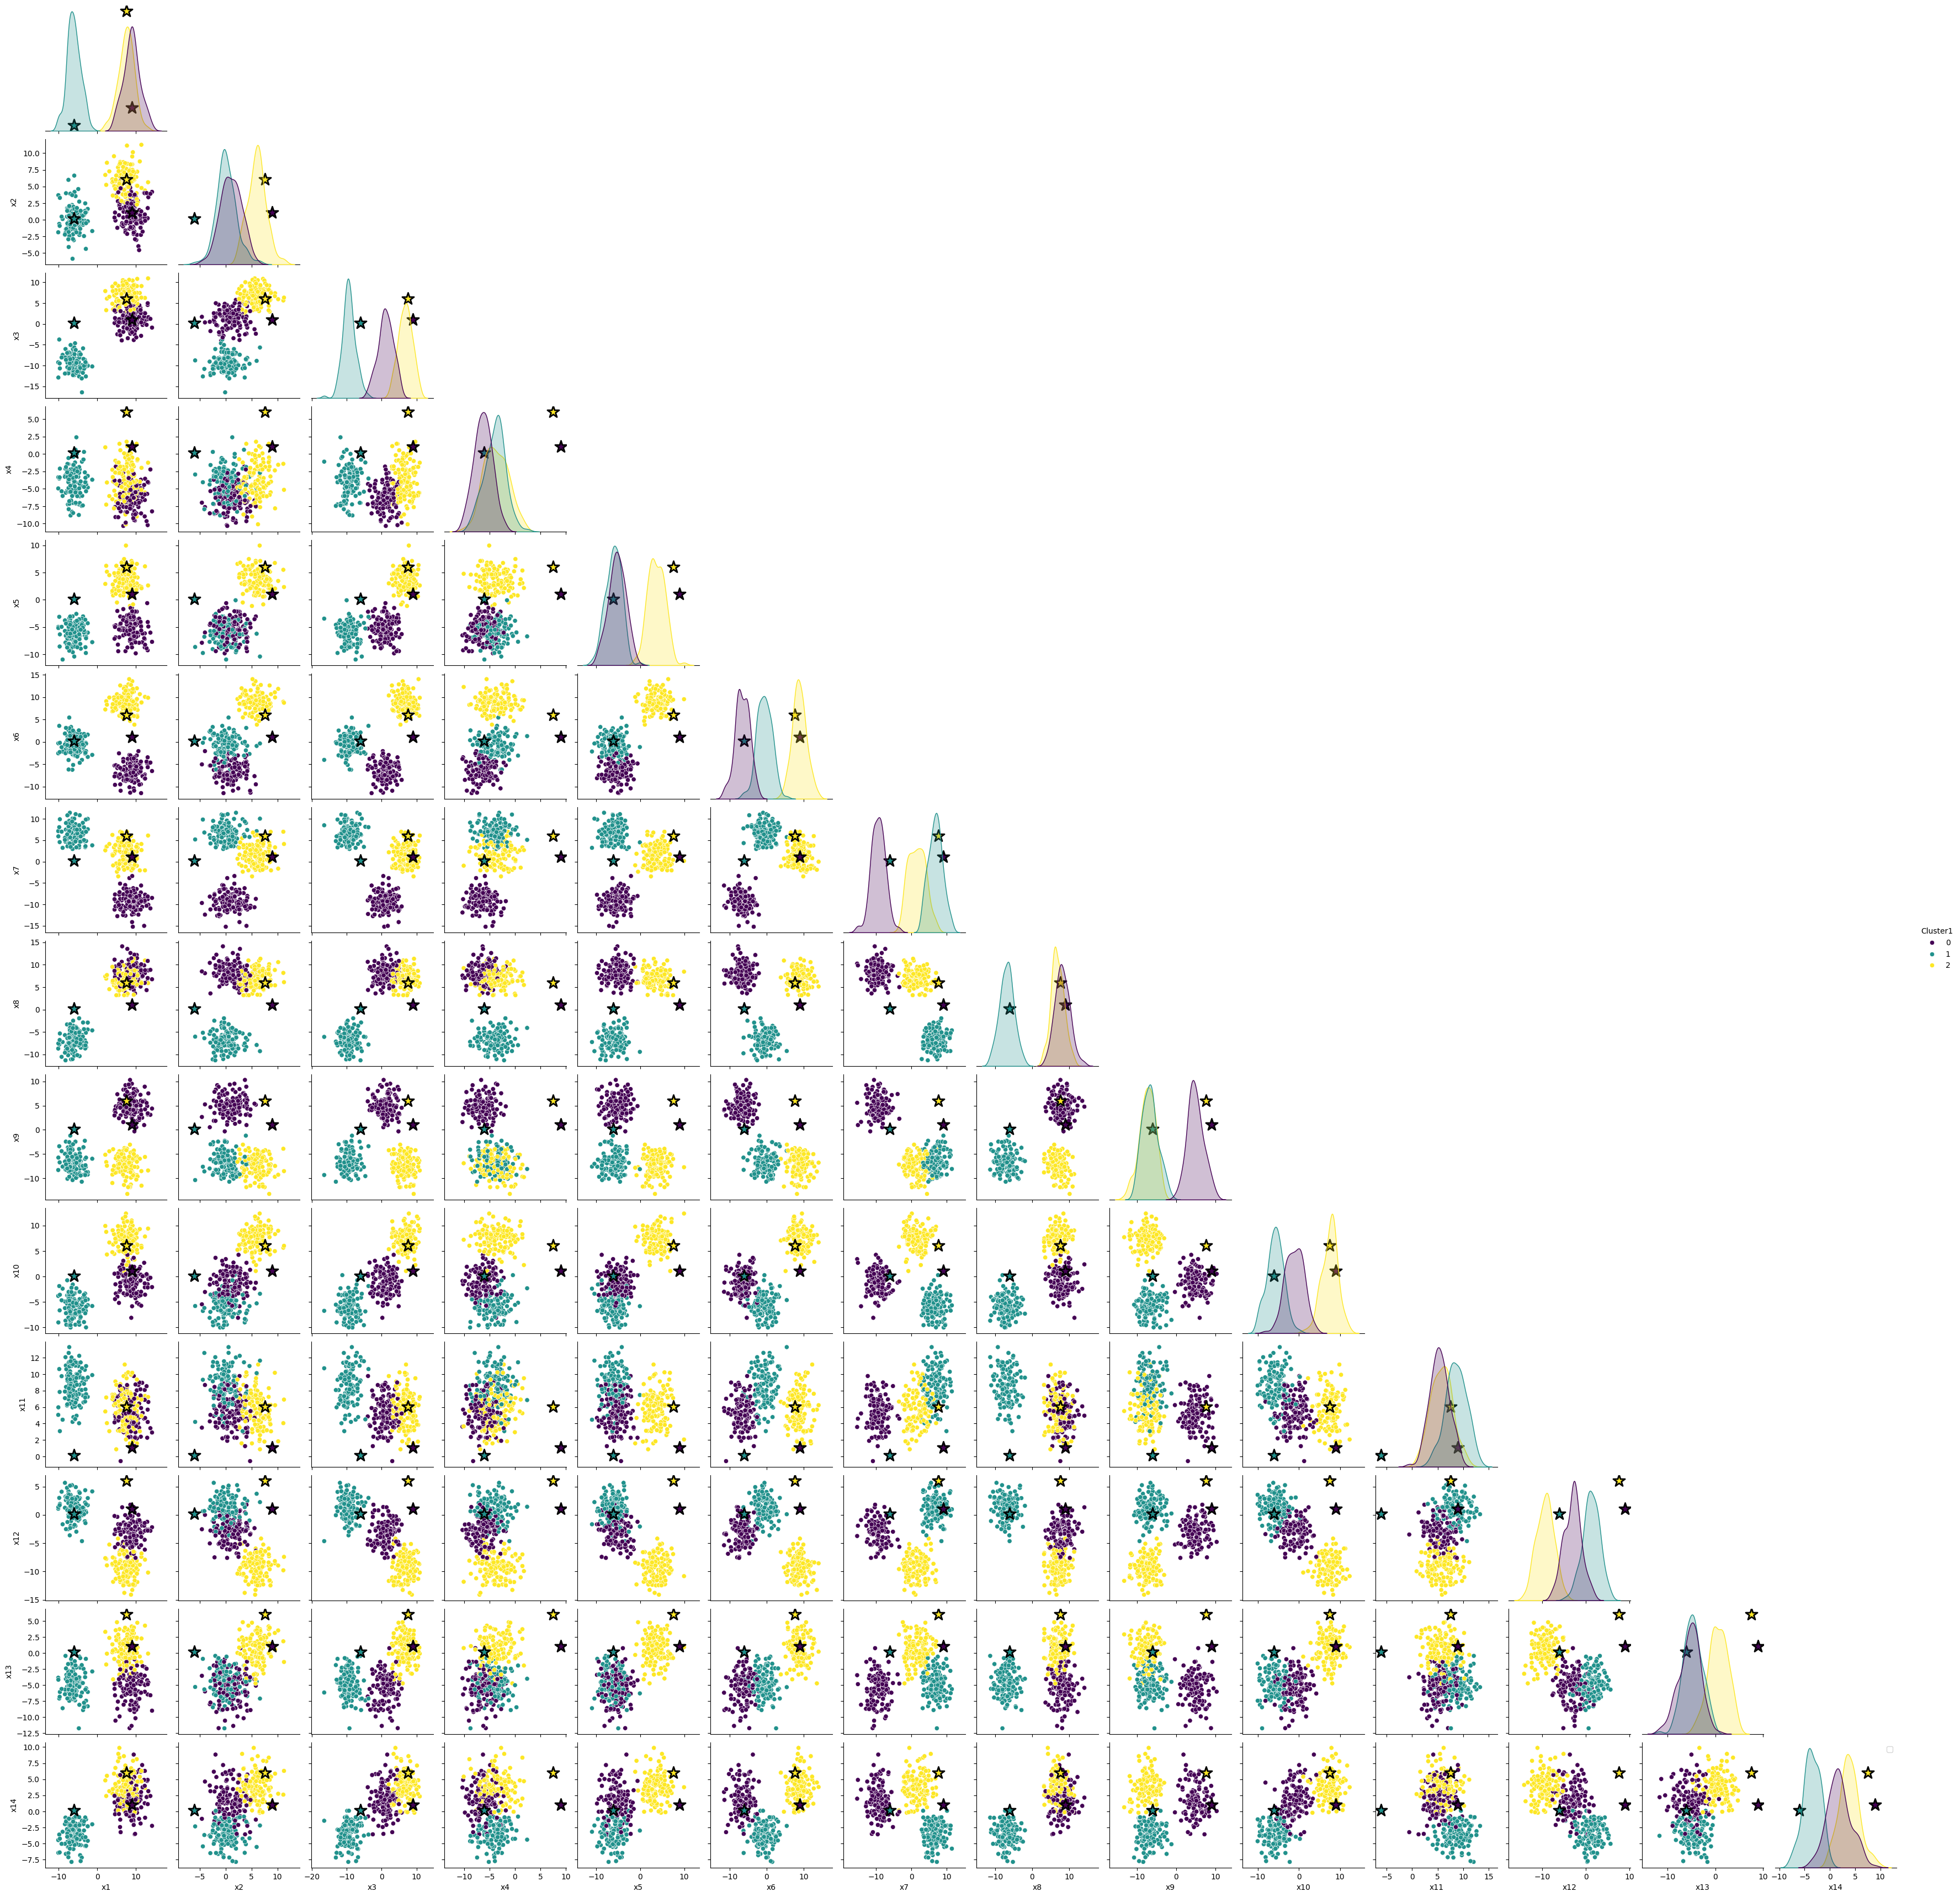

In [142]:
g = sns.pairplot(df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6','x7','x8','x9','x10','x11','x12','x13','x14', 'Cluster1']],
                 corner=True, diag_kind="kde", hue='Cluster1', palette='viridis')

# Asignar colores de acuerdo al clúster a cada centroide
for i in range(km.cluster_centers_.shape[0]):  # Iteramos sobre los centroides
    # Utilizamos el color del clúster
    cluster_color = sns.color_palette("viridis", as_cmap=True)(i / (km.n_clusters - 1))

    for j in range(len(g.axes)):  # Iteramos sobre las filas de la matriz de gráficos
        for k in range(len(g.axes[j])):  # Iteramos sobre las columnas de cada fila
            ax = g.axes[j, k]
            if ax:  # Verificamos si el gráfico es válido (no es None)
                ax.scatter(km.cluster_centers_[i, 0], km.cluster_centers_[i, 1],
                           color=cluster_color, marker='*', label=f'Centroid {i+1}',
                           s=256, edgecolor='black', linewidth=2)

plt.show()

### Questions

Provides a detailed description of your results

Your response: At first, it seemed that some parts of the code malfunctioned because some clusters were closer to a different centroid rather than their own. However, after further analysis, it became clear that this is due to the centroids being positioned in a 14-dimensional space, while we are only visualizing the data in 2D

## d) Elbow plot

Compute the Elbow plot

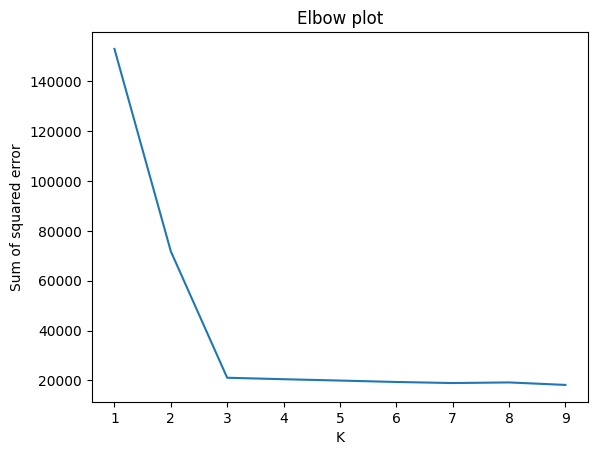

In [143]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit_predict(df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6','x7','x8','x9','x10','x11','x12','x13','x14']])
    sse.append(km.inertia_)

plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


### Questions

What is the best number of clusters K? (argue your response)

Your response: The optimal number of clusters is 3. This is because before k=3, adding clusters significantly reduces errors, whereas after k=3, the reduction in error slows down. This means that additional clusters do not provide much extra value. Therefore, the dataset naturally forms three distinct groups

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response: Yes, because I initially selected 3 clusters based on the pairplot, which showed visual groupings suggesting a maximum of three distinct clusters


# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [205]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


2) Plot some of the observations (add in the title the label/digit of that obserbation)

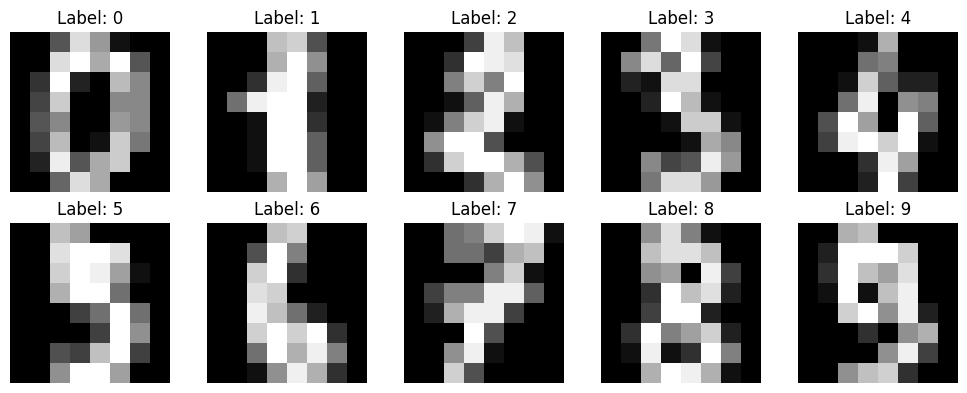

In [206]:
num_images = 10

plt.figure(figsize=(10, 4))

for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [207]:
km = KMeans(n_clusters=10, n_init="auto")

Cluster1 = km.fit_predict(digits.data)
Cluster2 = km.fit_predict(digits.data[:, 0:8])
Cluster3 = km.fit_predict(digits.data[:, 24:32])
Cluster4 = km.fit_predict(digits.data[:, 56:64])

print("Cluster labels for KmeansAll: " + str(Cluster1))
print("Cluster labels for Kmeans1row:"+ str(Cluster2))
print("Cluster labels for Kmeans4row:"+ str(Cluster3))
print("Cluster labels for Kmeans8row:"+ str(Cluster4))

Cluster labels for KmeansAll: [4 2 2 ... 2 9 9]
Cluster labels for Kmeans1row:[1 1 3 ... 1 7 8]
Cluster labels for Kmeans4row:[7 2 4 ... 1 6 9]
Cluster labels for Kmeans8row:[1 4 6 ... 1 4 4]


4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

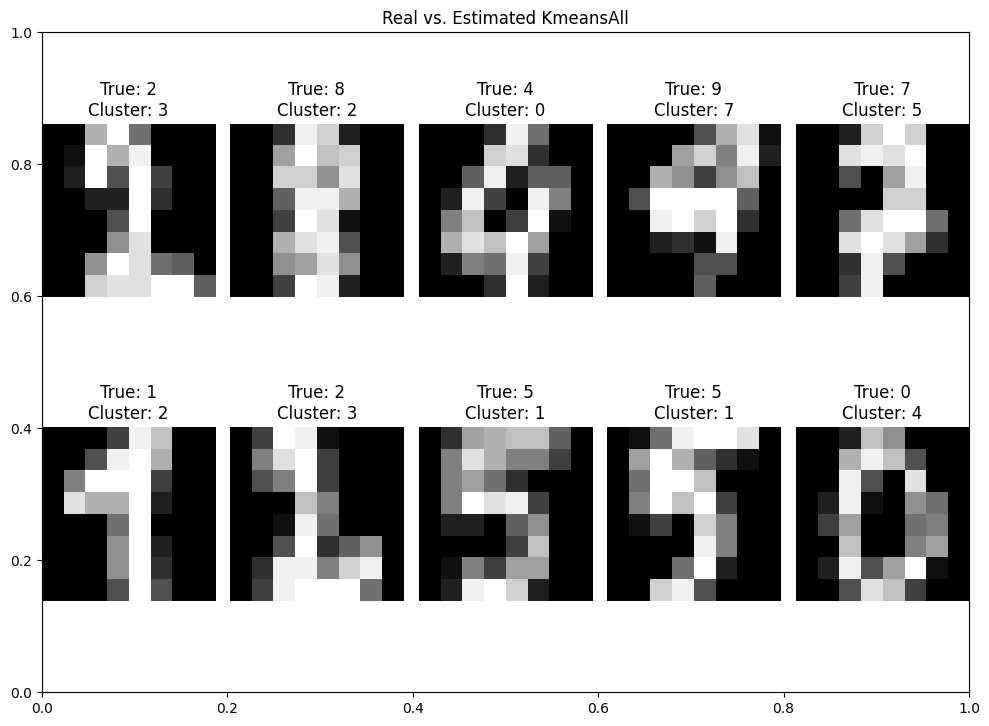

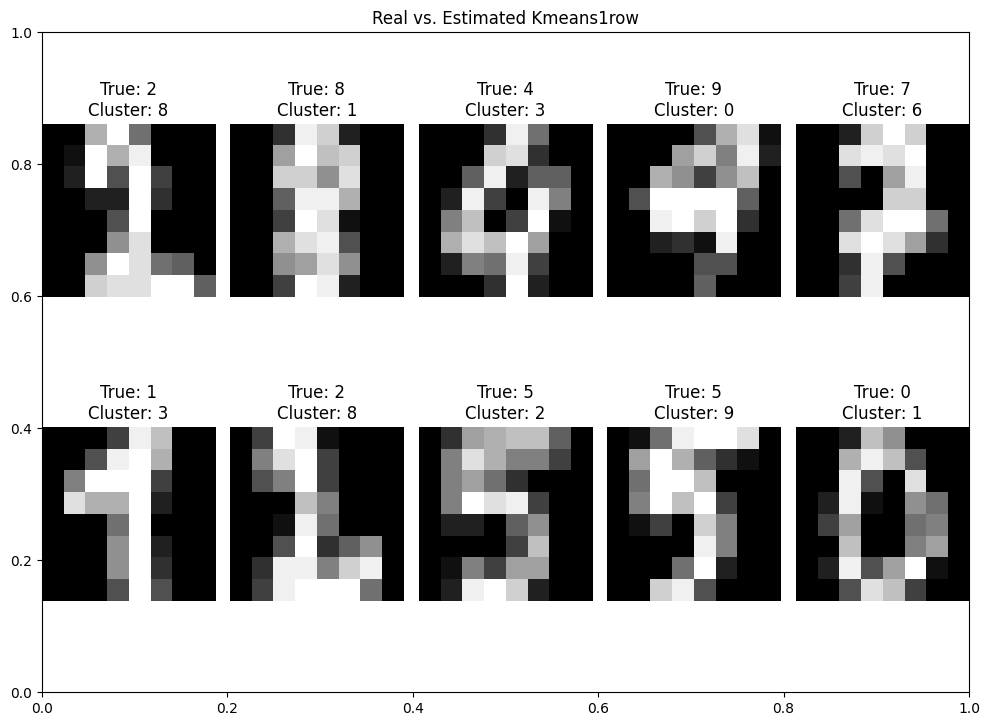

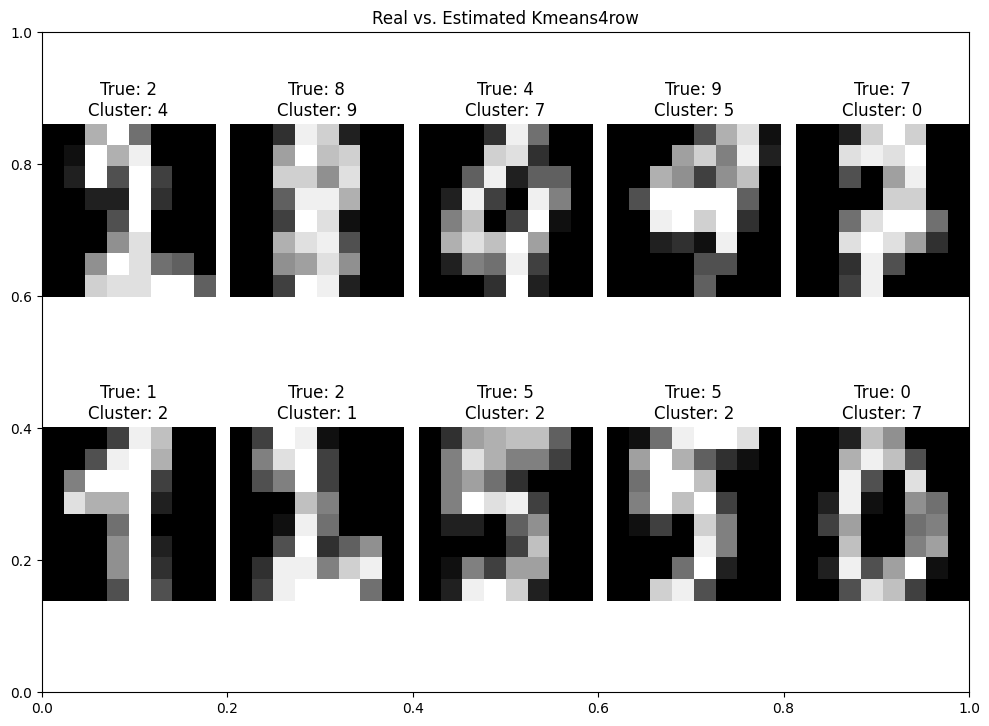

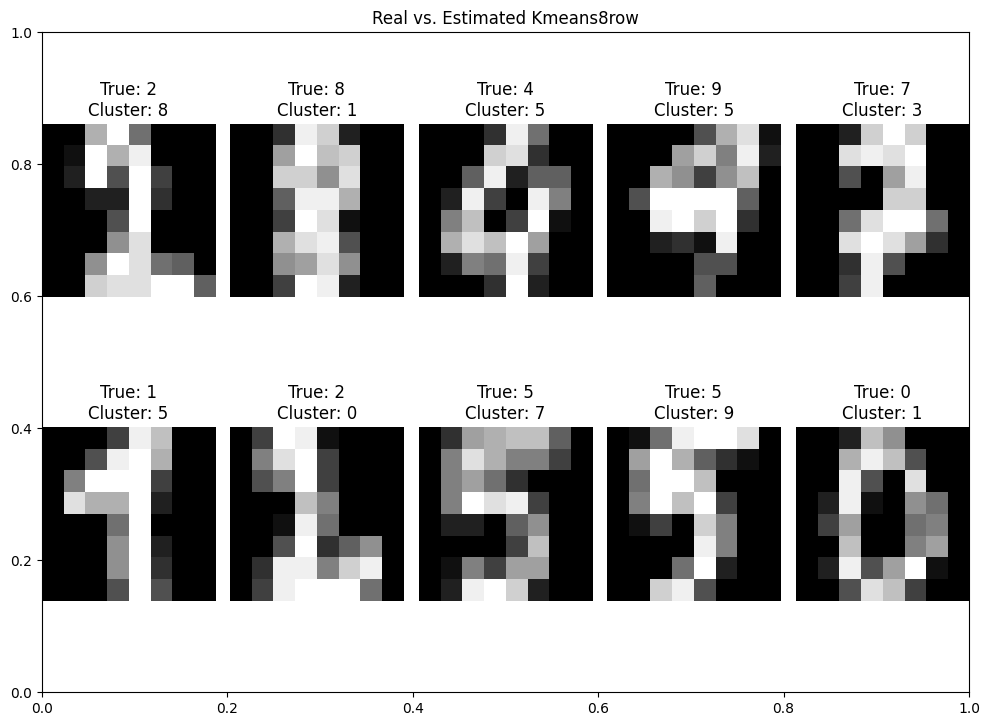

In [209]:
num_samples = 10
indices = np.random.choice(len(digits.data), num_samples, replace=False)

# Plot the selected observations
plt.figure(figsize=(10, 7))
plt.title("Real vs. Estimated KmeansAll")
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[idx], cmap='gray')
    real_label = digits.target[idx]
    predicted_label = Cluster1[idx]
    plt.title(f"True: {real_label}\nCluster: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Real vs. Estimated Kmeans1row")
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[idx], cmap='gray')
    real_label = digits.target[idx]
    predicted_label = Cluster2[idx]
    plt.title(f"True: {real_label}\nCluster: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 7))
plt.title("Real vs. Estimated Kmeans4row")
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[idx], cmap='gray')
    real_label = digits.target[idx]
    predicted_label = Cluster3[idx]
    plt.title(f"True: {real_label}\nCluster: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 7))
plt.title("Real vs. Estimated Kmeans8row")
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[idx], cmap='gray')
    real_label = digits.target[idx]
    predicted_label = Cluster4[idx]
    plt.title(f"True: {real_label}\nCluster: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

5) Compute the Elbow plot

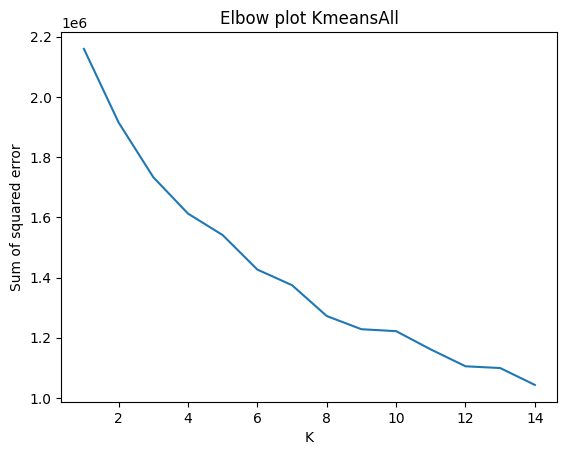

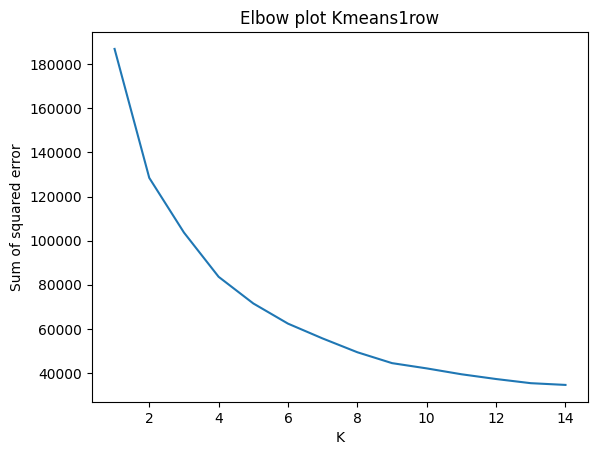

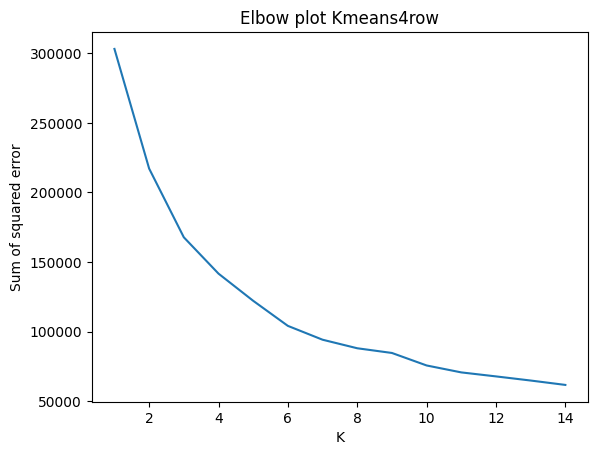

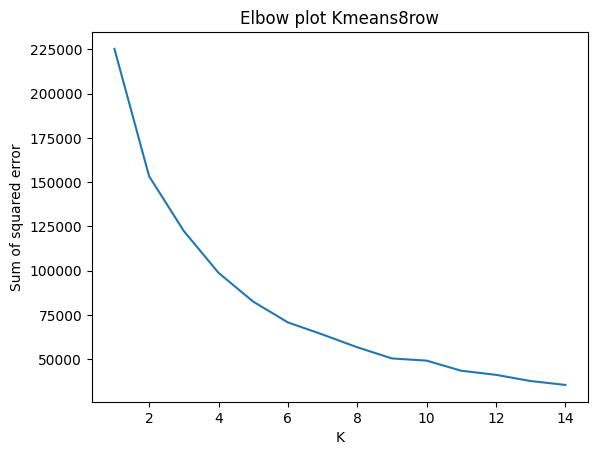

In [210]:
sse = []
k_rng = range(1,15)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit_predict(digits.data)
    sse.append(km.inertia_)

plt.plot(k_rng,sse)

plt.title('Elbow plot KmeansAll')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

sse = []
k_rng = range(1,15)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit_predict(digits.data[:, 0:8])
    sse.append(km.inertia_)

plt.plot(k_rng,sse)

plt.title('Elbow plot Kmeans1row')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()
sse = []
k_rng = range(1,15)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit_predict(digits.data[:, 24:32])
    sse.append(km.inertia_)

plt.plot(k_rng,sse)

plt.title('Elbow plot Kmeans4row')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

sse = []
k_rng = range(1,15)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit_predict(digits.data[:, 56:64])
    sse.append(km.inertia_)

plt.plot(k_rng,sse)

plt.title('Elbow plot Kmeans8row')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response): In all examples, the clustering results were quite similar, which was unexpected. Initially, it was anticipated that the clustering method using all the data from the image (KmeansAll) would provide more accurate results compared to the methods that used only a line from the image (Kmeans1row, Kmeans4row, or Kmeans8row). However, the difference in the elbow plot was minimal. Despite this, the clustering using all the data (KmeansAll) did provide a more clearly defined "elbow" in the plot, suggesting it had a slightly better fit, though the overall performance was quite similar across all methods.

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [218]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


2) Plot some of the observations  (add in the title the label/digit of that obserbation)

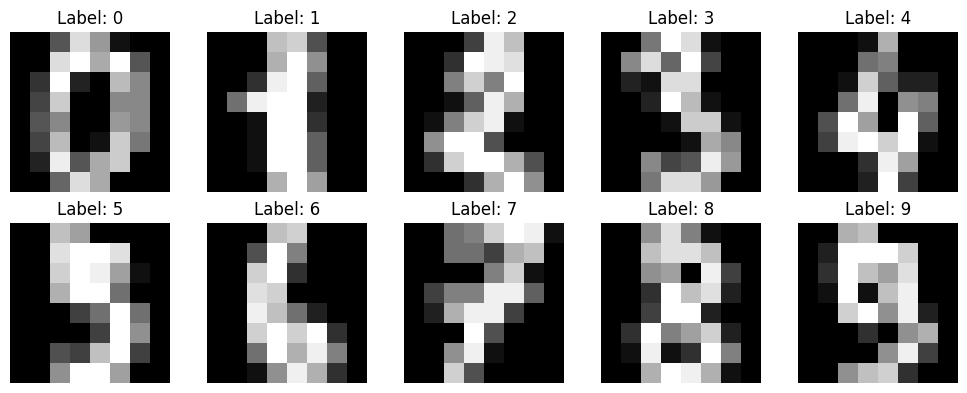

In [212]:
num_images = 10

plt.figure(figsize=(10, 4))

for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

3) Split the dataset in train and test

In [254]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)


4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [255]:
classifier1 = LogisticRegression(C=1e5)
classifier1.fit(X_train0,y_train0)

X_train1, X_test1, y_train1, y_test1 = train_test_split(digits.data[:, 0:8], digits.target, test_size=0.2, random_state=42)
classifier2 = LogisticRegression(C=1e5)
classifier2.fit(X_train1,y_train1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(digits.data[:, 24:32], digits.target, test_size=0.2, random_state=42)
classifier3 = LogisticRegression(C=1e5)
classifier3.fit(X_train2,y_train2)

X_train3, X_test3, y_train3, y_test3 = train_test_split(digits.data[:, 56:64], digits.target, test_size=0.2, random_state=42)
classifier4 = LogisticRegression(C=1e5)
classifier4.fit(X_train3,y_train3)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(C=100000.0)

5) Make predictions (use the test set)

In [256]:
ypred1 = classifier1.predict(X_test0)
ypred2 = classifier2.predict(X_test1)
ypred3 = classifier3.predict(X_test2)
ypred4 = classifier4.predict(X_test3)

6) Compute performance metrics

In [258]:
acctotal = 100*accuracy_score(y_test0, ypred1)
print("Total accuracy using all the variables is: " + str(acctotal) + "%")

acctotal = 100*accuracy_score(y_test1, ypred2)
print("Total accuracy using the first row is: " + str(acctotal) + "%")

acctotal = 100*accuracy_score(y_test2, ypred3)
print("Total accuracy using the fourth row is: " + str(acctotal) + "%")

acctotal = 100*accuracy_score(y_test3, ypred4)
print("Total accuracy using the last row is: " + str(acctotal) + "%")

Total accuracy using all the variables is: 96.11111111111111%
Total accuracy using the first row is: 38.88888888888889%
Total accuracy using the fourth row is: 59.72222222222222%
Total accuracy using the last row is: 46.94444444444444%


7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

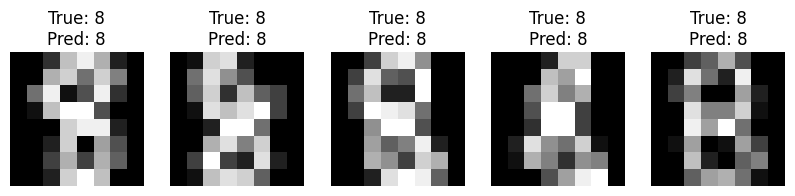

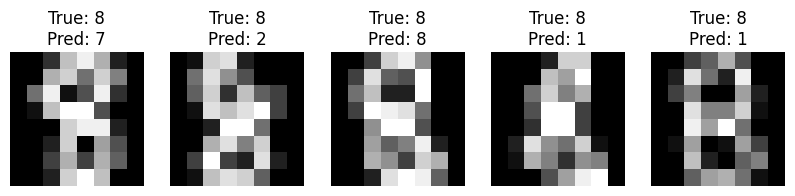

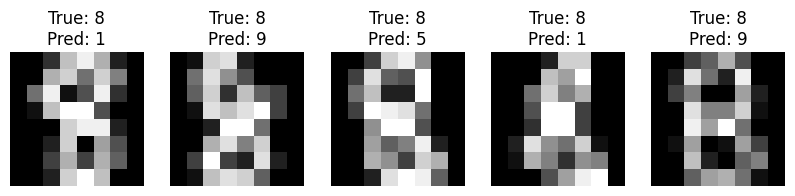

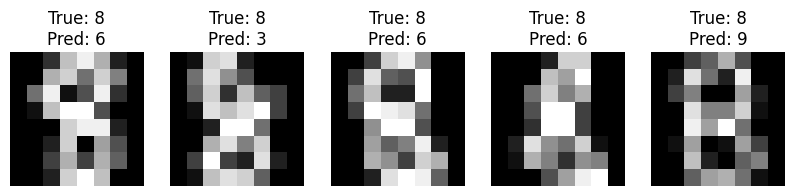

In [283]:
def plot_predictions_for_digit(digit, X_test, y_test, y_pred, num_images=5):
    # Find the indices of the test samples corresponding to the digit
    indices = np.where(y_test == digit)[0]

    # Limit the number of images to display
    num_images = min(num_images, len(indices))

    # Plot the images for this digit
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X_test0[indices[i]].reshape(8, 8), cmap='gray')
        plt.title(f"True: {digit}\nPred: {y_pred[indices[i]]}")
        plt.axis('off')
    plt.show()

ypred1 = classifier1.predict(X_test0)
ypred2 = classifier2.predict(X_test1)
ypred3 = classifier3.predict(X_test2)
ypred4 = classifier4.predict(X_test3)

# Example: Plot predictions for a digit (e.g., digit 3) for all classifiers
plot_predictions_for_digit(8, X_test0, y_test0, ypred1, num_images=5)  # Using all features
plot_predictions_for_digit(8, X_test1, y_test1, ypred2, num_images=5)  # Using the first row
plot_predictions_for_digit(8, X_test2, y_test2, ypred3, num_images=5)  # Using the fourth row
plot_predictions_for_digit(8, X_test3, y_test3, ypred4, num_images=5)  # Using the last row

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response): In this example, it is clear that ClassifierAll delivers better performance, as expected from a model that is capable of analyzing the entire image. This is evident in both the accuracy percentage and the final plot, where ClassifierAll consistently outperforms the other three classifiers in all cases, yielding significantly better results

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Yo creo que realmente desarrollé mis habilidades para interpretar interacciones entre variables, ya que pude analizar cómo diferentes características influyen en los resultados del modelo. Utilicé gráficos para identificar patrones y relaciones entre las variables relevantes, lo que me permitió comprender mejor cómo estas interacciones afectan el comportamiento del fenómeno investigado. Ademas de las graficas tambien pude utilizar diferentes comandos para sacar informacion de las tabla en las cuales me basaba para hacer/leer las graficas

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: En esta competencia, reconozco que tuve algunos desafíos, ya que las instrucciones más complejas que no vimos en clase requirieron que buscara ayuda externa. Sin embargo, a pesar de estas dificultades, logré entender el código y completar los modelos bivariados con éxito. Gracias a este proceso, adquirí una comprensión profunda de cómo construir modelos que explican el comportamiento de un fenómeno. Si me lo pidieran nuevamente, sé que podría realizar la tarea con mayor facilidad. En general, considero que cumplí con las expectativas de la clase pero no superarlas

